# Feature Engineering
feature engineering is a tool that you can leverage as you explore and learn about your data. As you explore a dataset, you might find that two variables are related in some way. Feature engineering is all about creating a new variable with a sum, difference, product, or ratio between those original variables that may lend a better insight into the research questions you seek to answer.

For example, if you have one variable that gives a count of crime incidents, and a second one that gives population totals, then you may want to engineer a new variable by dividing the former by the latter, obtaining an incident rate. This would account for a possible relationship between the original features where if there are more people, there might naturally be more chances for crimes to occur. If we looked at the raw counts rather than the incident rate, we risk just seeing information about population sizes rather than what we might really want.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df=pd.read_csv('../Code/pokemon.csv')
df.head()

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


In this section, I'm going to look an example of biases in Pokemon creatures statistics.More specifically, I want to know if the creature's offensive stats are biased towards physical or special-attack,if their defensive stats are similarly biased towards physical or special defense.

To do this, I will create new variables based on ratios.The attack ratio column is the ratio between attack and special-attack.

If a creature has a value greater than one,then they favored the physical side and if less than one, they favor the special sides. 

(5.656854249492381, 0.1767766952966369)

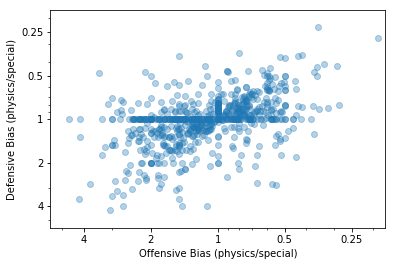

In [10]:
df['atk_ratio'] = df.attack/df['special-attack']
df['def_ratio'] = df.defense/df['special-defense']

plt.scatter(data = df, x = 'atk_ratio', y = 'def_ratio', alpha=1/3)
plt.xlabel('Offensive Bias (physics/special)')
plt.ylabel('Defensive Bias (physics/special)')
plt.xscale('log')
plt.yscale('log');
tick_loc = [.25, .5, 1, 2 , 4]
plt.xticks(tick_loc,tick_loc)
plt.yticks(tick_loc,tick_loc);
plt.xlim(2**2.5, 2**-2.5)
plt.ylim(2**2.5, 2**-2.5)

* In the final plot, we see that most points seem to fall along a diagonal line.

* In the upper right-hand quadrant,we have Pokemon species that are physical biased in both offense and defense,

* In the lower left-hand quadrant, they are special biased in both offense and defense.

* Interestingly, there appears to be a large number of Pokemon on the y equals one line showing no defensive bias. 

Another way that you can perform **feature engineering** is to use the **cut** function to divide a numeric variable into ordered bins. When we split a numeric variable into ordinal bins, it opens it up to more visual encodings. For example, we might facet plots by bins of a numeric variable, or use discrete color bins rather than a continuous color scale. This kind of discretization step might help in storytelling by clearing up noise, allowing the reader to concentrate on major trends in the data. Of course, the bins might also mislead if they're spaced improperly – check out this  [PolicyViz](https://policyviz.com/2017/11/02/choosing-map-bins/) post if you'd like to see a deeper discussion in the context of map-based visualizations.